# Subject: Advanced Data Analysis

# Module: Geospatial Analysis

## Session 5 - Geographic Analysis of Social Network Data 

### Demo 1 -  Sentiment analysis and Geospatial analysis on Carles Puigdemont tweets using Python 

The requirements that we'll need to install are:

- NumPy: This is the fundamental package for scientific computing with Python. Besides its obvious scientific uses, NumPy can also be used as an efficient multi-dimensional container of generic data.
- Pandas: This is an open source library providing high-performance, easy-to-use data structures and data analysis tools.
- Tweepy: This is an easy-to-use Python library for accessing the Twitter API.
- Matplotlib: This is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.
- Seaborn: This is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.
- Textblob: This is a Python library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks.

https://textblob.readthedocs.io/en/dev/

$ pip install -U textblob

$ python -m textblob.download_corpora

https://github.com/tweepy/tweepy

$ pip install tweepy

## 1. Extracting twitter data (tweepy + pandas)

### 1.1. Importing our libraries

In [1]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1.2. Creating a Twitter App

In order to extract tweets for a posterior analysis, we need to access to our Twitter account and create an app. The website to do this is https://apps.twitter.com/

From this app that we're creating we will save the following information:

- Consumer Key (API Key)

- Consumer Secret (API Secret)

- Access Token

- Access Token Secret


In [2]:
# Twitter App access keys for @user

# Consume:
CONSUMER_KEY    = 'Uu3D2hHGljVnU2vchDYmHZtGw'
CONSUMER_SECRET = 'aUfG03L1ZUQjojGK1dQ6dKFC8nktUZQZ4eZDU3p23hEA8ZQus3'

# Access:
ACCESS_TOKEN  = '955416286477082625-85nByhWARuuQQJt2QyfFwublVbSE28L'
ACCESS_SECRET = 'DWARKyhsQKwm1aVWiTsS8RjKQGy778iaERGHeKnauB9Sb'

In [3]:
# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
    
    # Return API with authentication:
    api = tweepy.API(auth)
    return api

### 1.3. Tweets extraction

Now that we've created a function to setup the Twitter API, we can use this function to create an "extractor" object. After this, we will use Tweepy's function extractor.user_timeline(screen_name, count) to extract from screen_name's user the quantity of count tweets.

As it is mentioned in the title, I've chosen @KRLS as the user to extract data for a posterior analysis. The way to extract Twitter's data is as follows:

In [4]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="KRLS", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

Cent dies d'infàmia, d'injustícia, d'indefensió, d'escarni i de venjança. Una abominació del concepte de justícia i… https://t.co/zUlHu9zhDS

RT @parlament_cat: El Butlletí Oficial del #Parlament publica la proposta de @KRLS Puigdemont com a candidat per ser investit president de…

Algun dia entendran que no tenim cap problema amb Espanya ni amb la seva bandera. La batalla és contra qui exerceix… https://t.co/cyS7uDNddh

Els cops de porra de l'#1Oct no varen marcar només la pell, van deixar una marca inesborrable en la memòria i l'esp… https://t.co/aWsF0FK9Fr

RT @jordialapreso: Demà farà 100 dies que espero la #llibertat. Seguiré pacient esperant, i quan arribi, sortiré per seguir fent camí amb t…



We now have an extractor and extracted data, which is listed in the tweets variable. I must mention at this point that each element in that list is a tweet object from Tweepy.

### 1.4. Creating a (pandas) DataFrame

We now have initial information to construct a pandas DataFrame, in order to manipulate the info in a very easy way.

In [5]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,"Cent dies d'infàmia, d'injustícia, d'indefensi..."
1,RT @parlament_cat: El Butlletí Oficial del #Pa...
2,Algun dia entendran que no tenim cap problema ...
3,Els cops de porra de l'#1Oct no varen marcar n...
4,RT @jordialapreso: Demà farà 100 dies que espe...
5,⚡️ “We will not surrender to authoritarianism”...
6,RT @uni_copenhagen: The Catalan leader Carles ...
7,Arribat a #København. A les 14h participo al d...
8,"Arrimadas, Rivera i Albiol encapçalant una man..."
9,"Lideratge, honestedat, determinació i humilita..."


An interesting thing is the number if internal methods that the tweetstructure has in Tweepy:

In [6]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


The interesting part from here is the quantity of metadata contained in a single tweet. If we want to obtain data such as the creation date, or the source of creation, we can access the info with this attributes. 

In [7]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

956075747088662529
2018-01-24 08:06:35
Twitter for Android
5725
2945
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/zUlHu9zhDS', 'expanded_url': 'https://twitter.com/i/web/status/956075747088662529', 'display_url': 'twitter.com/i/web/status/9…', 'indices': [117, 140]}]}


In [8]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['coordinates']    = np.array([tweet.coordinates for tweet in tweets])

In [9]:
data

,Tweets,len,ID,Date,Source,Likes,coordinates
0,"Cent dies d'infàmia, d'injustícia, d'indefensi...",140,956075747088662529,2018-01-24 08:06:35,Twitter for Android,5725,None
1,RT @parlament_cat: El Butlletí Oficial del #Pa...,139,956073123337687041,2018-01-24 07:56:10,Twitter for Android,0,None
2,Algun dia entendran que no tenim cap problema ...,140,955781533834645505,2018-01-23 12:37:29,Twitter for Android,37884,None
3,Els cops de porra de l'#1Oct no varen marcar n...,140,955730580330688513,2018-01-23 09:15:01,Twitter for Android,14038,None
4,RT @jordialapreso: Demà farà 100 dies que espe...,140,955729594484711425,2018-01-23 09:11:06,Twitter for Android,0,None
5,⚡️ “We will not surrender to authoritarianism”...,71,955537340071600128,2018-01-22 20:27:09,Twitter Web Client,13204,None
6,RT @uni_copenhagen: The Catalan leader Carles ...,139,955427218062110720,2018-01-22 13:09:34,Twitter for Android,0,None
7,Arribat a #København. A les 14h participo al d...,133,955354470833106945,2018-01-22 08:20:30,Twitter for Android,15332,None
8,"Arrimadas, Rivera i Albiol encapçalant una man...",140,955050333700546560,2018-01-21 12:11:58,Twitter for Android,23540,None
9,"Lideratge, honestedat, determinació i humilita...",140,954742985845104640,2018-01-20 15:50:40,Twitter for Android,4653,None


In [10]:
# We convert the Date type:
data['timestamp'] = pd.to_datetime(data['Date'], unit='s')

In [11]:
data['timestamp'] = data['timestamp'].dt.strftime('%Y-%m-%d')

In [12]:
data

,Tweets,len,ID,Date,Source,Likes,coordinates,timestamp
0,"Cent dies d'infàmia, d'injustícia, d'indefensi...",140,956075747088662529,2018-01-24 08:06:35,Twitter for Android,5725,None,2018-01-24
1,RT @parlament_cat: El Butlletí Oficial del #Pa...,139,956073123337687041,2018-01-24 07:56:10,Twitter for Android,0,None,2018-01-24
2,Algun dia entendran que no tenim cap problema ...,140,955781533834645505,2018-01-23 12:37:29,Twitter for Android,37884,None,2018-01-23
3,Els cops de porra de l'#1Oct no varen marcar n...,140,955730580330688513,2018-01-23 09:15:01,Twitter for Android,14038,None,2018-01-23
4,RT @jordialapreso: Demà farà 100 dies que espe...,140,955729594484711425,2018-01-23 09:11:06,Twitter for Android,0,None,2018-01-23
5,⚡️ “We will not surrender to authoritarianism”...,71,955537340071600128,2018-01-22 20:27:09,Twitter Web Client,13204,None,2018-01-22
6,RT @uni_copenhagen: The Catalan leader Carles ...,139,955427218062110720,2018-01-22 13:09:34,Twitter for Android,0,None,2018-01-22
7,Arribat a #København. A les 14h participo al d...,133,955354470833106945,2018-01-22 08:20:30,Twitter for Android,15332,None,2018-01-22
8,"Arrimadas, Rivera i Albiol encapçalant una man...",140,955050333700546560,2018-01-21 12:11:58,Twitter for Android,23540,None,2018-01-21
9,"Lideratge, honestedat, determinació i humilita...",140,954742985845104640,2018-01-20 15:50:40,Twitter for Android,4653,None,2018-01-20


### 2. Sentiment analysis

### 2.1. Importing textblob

Anyway, getting back to the code we will just add an extra column to our data. This column will contain the sentiment analysis and we can plot the dataframe to see the update:

In [13]:
from textblob import TextBlob #TextBlob is a Python (2 and 3) library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.
import re #This module provides regular expression matching operations.Regular expressions use the backslash character ('\') to indicate special forms or to allow special characters to be used without invoking their special meaning. 

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

https://link.springer.com/chapter/10.1007/978-3-319-47602-5_40

In [14]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,coordinates,timestamp,SA
0,"Cent dies d'infàmia, d'injustícia, d'indefensi...",140,956075747088662529,2018-01-24 08:06:35,Twitter for Android,5725,None,2018-01-24,0
1,RT @parlament_cat: El Butlletí Oficial del #Pa...,139,956073123337687041,2018-01-24 07:56:10,Twitter for Android,0,None,2018-01-24,0
2,Algun dia entendran que no tenim cap problema ...,140,955781533834645505,2018-01-23 12:37:29,Twitter for Android,37884,None,2018-01-23,0
3,Els cops de porra de l'#1Oct no varen marcar n...,140,955730580330688513,2018-01-23 09:15:01,Twitter for Android,14038,None,2018-01-23,0
4,RT @jordialapreso: Demà farà 100 dies que espe...,140,955729594484711425,2018-01-23 09:11:06,Twitter for Android,0,None,2018-01-23,1
5,⚡️ “We will not surrender to authoritarianism”...,71,955537340071600128,2018-01-22 20:27:09,Twitter Web Client,13204,None,2018-01-22,0
6,RT @uni_copenhagen: The Catalan leader Carles ...,139,955427218062110720,2018-01-22 13:09:34,Twitter for Android,0,None,2018-01-22,0
7,Arribat a #København. A les 14h participo al d...,133,955354470833106945,2018-01-22 08:20:30,Twitter for Android,15332,None,2018-01-22,0
8,"Arrimadas, Rivera i Albiol encapçalant una man...",140,955050333700546560,2018-01-21 12:11:58,Twitter for Android,23540,None,2018-01-21,0
9,"Lideratge, honestedat, determinació i humilita...",140,954742985845104640,2018-01-20 15:50:40,Twitter for Android,4653,None,2018-01-20,0


In [15]:
type(data)

pandas.core.frame.DataFrame

In [16]:
data

,Tweets,len,ID,Date,Source,Likes,coordinates,timestamp,SA
0,"Cent dies d'infàmia, d'injustícia, d'indefensi...",140,956075747088662529,2018-01-24 08:06:35,Twitter for Android,5725,None,2018-01-24,0
1,RT @parlament_cat: El Butlletí Oficial del #Pa...,139,956073123337687041,2018-01-24 07:56:10,Twitter for Android,0,None,2018-01-24,0
2,Algun dia entendran que no tenim cap problema ...,140,955781533834645505,2018-01-23 12:37:29,Twitter for Android,37884,None,2018-01-23,0
3,Els cops de porra de l'#1Oct no varen marcar n...,140,955730580330688513,2018-01-23 09:15:01,Twitter for Android,14038,None,2018-01-23,0
4,RT @jordialapreso: Demà farà 100 dies que espe...,140,955729594484711425,2018-01-23 09:11:06,Twitter for Android,0,None,2018-01-23,1
5,⚡️ “We will not surrender to authoritarianism”...,71,955537340071600128,2018-01-22 20:27:09,Twitter Web Client,13204,None,2018-01-22,0
6,RT @uni_copenhagen: The Catalan leader Carles ...,139,955427218062110720,2018-01-22 13:09:34,Twitter for Android,0,None,2018-01-22,0
7,Arribat a #København. A les 14h participo al d...,133,955354470833106945,2018-01-22 08:20:30,Twitter for Android,15332,None,2018-01-22,0
8,"Arrimadas, Rivera i Albiol encapçalant una man...",140,955050333700546560,2018-01-21 12:11:58,Twitter for Android,23540,None,2018-01-21,0
9,"Lideratge, honestedat, determinació i humilita...",140,954742985845104640,2018-01-20 15:50:40,Twitter for Android,4653,None,2018-01-20,0


### 2.2. Analyzing the results

#### 2.2.1. Calculation of the percentage of the classified tweets

In [17]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [18]:
pos_tweets

['RT @jordialapreso: Demà farà 100 dies que espero la #llibertat. Seguiré pacient esperant, i quan arribi, sortiré per seguir fent camí amb t…',
 'RT @pelledragsted: In october I met president Puigdemont in the Palau del Generalitat. I look forward to welcome him in the Danish Parliame…',
 "RT @lluis_llach: Hola Jordis, Oriol i Quim a la presó. Carles, Meritxell, Toni, Clara i Lluís a l'exili. Penso q potser no és tan important…",
 "Avui és un dia molt important, no per la Catalunya d'avui sinó per la #Catalunya del futur. I tu Laura representes… https://t.co/NAfkeVvBic",
 'RT @JuntsXCat: ▶️ Pare Manel: "A #JuntsXCat puc aportar l’experiència de molts i molts anys de treball en l’àmbit social, posant d\'exemple…',
 'Spanish soldier on top of a tank threatens me and @Pablo_Iglesias_ Unacceptable in the EU. Spanish government must… https://t.co/h2g8yq04dx',
 'RT @IvanMonforte: Què és el més fàcil quan no ets capaç de fer ni una sola proposta decent en ple segle XXI? Tombar les propostes 

In [19]:
neu_tweets

["Cent dies d'infàmia, d'injustícia, d'indefensió, d'escarni i de venjança. Una\xa0abominació del concepte de justícia i… https://t.co/zUlHu9zhDS",
 'RT @parlament_cat: El Butlletí Oficial del #Parlament publica la proposta de @KRLS Puigdemont com a candidat per ser investit president de…',
 'Algun dia entendran que no tenim cap problema amb Espanya ni amb la seva bandera. La batalla és contra qui exerceix… https://t.co/cyS7uDNddh',
 "Els cops de porra de l'#1Oct\xa0no varen marcar només la pell, van deixar una marca\xa0inesborrable\xa0en la memòria i l'esp… https://t.co/aWsF0FK9Fr",
 '⚡️ “We will not surrender to authoritarianism”\n\nhttps://t.co/y8K33LO2vm',
 'RT @uni_copenhagen: The Catalan leader Carles Puigdemont @KRLS discusses the current political situation in Catalonia and Europe  - follow…',
 'Arribat a #København. A les 14h participo al debat "Catalonia and Europe at a crossroads for democracy" a la… https://t.co/25gc3UiOyP',
 'Arrimadas, Rivera i Albiol encapçalant una mani

In [20]:
neg_tweets

['RT @hrw: Spanish police engaged in excessive force when confronting demonstrators in Catalonia during a disputed referendum on Catalonia’s…',
 'RT @aleixsarri: Op-ed at @FT: "The argument that the EU is guilty of double standards is bolstered by events in Spain, where elected politi…',
 "RT @FT: Two months ago ousted Catalan leader Carles Puigdemont's future looked bleak. Now his party is rapidly climbing in the polls https:…",
 "Vull recordar l'#1Oct amb dues imatges: la de l'esperança per crear un nou país, i la de la brutal repressió polici… https://t.co/KyOvrAdW3v",
 'RT @BBCWorld: Behind bars https://t.co/szExVOTvG2']

Now that we have the lists, we just print the percentages:

In [21]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 5.5%
Percentage of neutral tweets: 92.0%
Percentage de negative tweets: 2.5%


#### 2.2.2. Infographics of the tweets

In [22]:
# Pandas DataFrame with the Sentiment Analysis results
data.head()

,Tweets,len,ID,Date,Source,Likes,coordinates,timestamp,SA
0,"Cent dies d'infàmia, d'injustícia, d'indefensi...",140,956075747088662529,2018-01-24 08:06:35,Twitter for Android,5725,None,2018-01-24,0
1,RT @parlament_cat: El Butlletí Oficial del #Pa...,139,956073123337687041,2018-01-24 07:56:10,Twitter for Android,0,None,2018-01-24,0
2,Algun dia entendran que no tenim cap problema ...,140,955781533834645505,2018-01-23 12:37:29,Twitter for Android,37884,None,2018-01-23,0
3,Els cops de porra de l'#1Oct no varen marcar n...,140,955730580330688513,2018-01-23 09:15:01,Twitter for Android,14038,None,2018-01-23,0
4,RT @jordialapreso: Demà farà 100 dies que espe...,140,955729594484711425,2018-01-23 09:11:06,Twitter for Android,0,None,2018-01-23,1


In [23]:
# New Pandas DataFrame with a new name of the field including the Sentiment Analysis results (SA)
df1=data.rename(columns={'SA':'Polarity'})
df1.head()

,Tweets,len,ID,Date,Source,Likes,coordinates,timestamp,Polarity
0,"Cent dies d'infàmia, d'injustícia, d'indefensi...",140,956075747088662529,2018-01-24 08:06:35,Twitter for Android,5725,None,2018-01-24,0
1,RT @parlament_cat: El Butlletí Oficial del #Pa...,139,956073123337687041,2018-01-24 07:56:10,Twitter for Android,0,None,2018-01-24,0
2,Algun dia entendran que no tenim cap problema ...,140,955781533834645505,2018-01-23 12:37:29,Twitter for Android,37884,None,2018-01-23,0
3,Els cops de porra de l'#1Oct no varen marcar n...,140,955730580330688513,2018-01-23 09:15:01,Twitter for Android,14038,None,2018-01-23,0
4,RT @jordialapreso: Demà farà 100 dies que espe...,140,955729594484711425,2018-01-23 09:11:06,Twitter for Android,0,None,2018-01-23,1


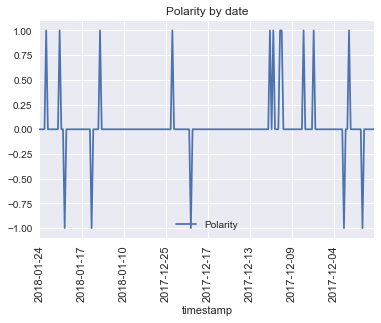

In [25]:
# Graph of the Polarity by dates (2017 and 2018)
df1.plot( kind='line', x='timestamp', y='Polarity',title='Polarity by date')
axes = plt.gca()
plt.xticks(rotation='vertical', fontsize=11)
plt.show()

In [28]:
# Graph of the Polarity by hour for a specific day
df1['Hour'] = pd.to_datetime(df1['Date'], format='%H:%M').dt.hour # to create a new column with the hour information
df1.head()

,Tweets,len,ID,Date,Source,Likes,coordinates,timestamp,Polarity,Hour
0,"Cent dies d'infàmia, d'injustícia, d'indefensi...",140,956075747088662529,2018-01-24 08:06:35,Twitter for Android,5725,None,2018-01-24,0,8
1,RT @parlament_cat: El Butlletí Oficial del #Pa...,139,956073123337687041,2018-01-24 07:56:10,Twitter for Android,0,None,2018-01-24,0,7
2,Algun dia entendran que no tenim cap problema ...,140,955781533834645505,2018-01-23 12:37:29,Twitter for Android,37884,None,2018-01-23,0,12
3,Els cops de porra de l'#1Oct no varen marcar n...,140,955730580330688513,2018-01-23 09:15:01,Twitter for Android,14038,None,2018-01-23,0,9
4,RT @jordialapreso: Demà farà 100 dies que espe...,140,955729594484711425,2018-01-23 09:11:06,Twitter for Android,0,None,2018-01-23,1,9


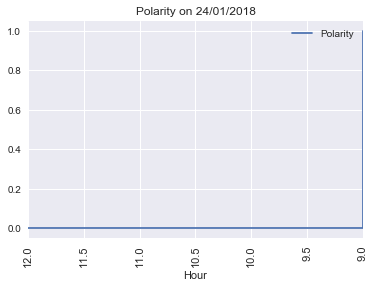

In [35]:
df2 = df1[df1['timestamp'] == '2018-01-23']
df2.plot( kind='line', x='Hour', y='Polarity',title='Polarity on 23/01/2018')
axes = plt.gca()
plt.xticks(rotation='vertical', fontsize=11)
plt.show()

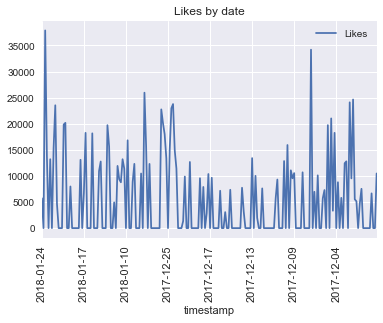

In [41]:
# Graph of the Likes by dates (2017 and 2018)
df1.plot( kind='line', x='timestamp', y='Likes',title='Likes by date')
axes = plt.gca()
plt.xticks(rotation='vertical', fontsize=11)
plt.show()

## 3. Export the dataframe

In [42]:
data.to_csv('data_twitter.csv')

## 4. QuantumGIS processing

### Task: 

Because Carles Puigdemont has not activated the Twiter location-sharing mode, we need to simulate a creation of 200 random location points within the administrative boundaries of Brussels.

 - Inside QuantumGIS lets calculate a shapefile with 200 random points inside Brussels. Use the function "Random Points in layer bounds" (Menu Vector, Research tools).

- Add the longitude and latitude columns with the option "Export/Add geometry columns" (Menu Vector, Geometry tools).

- Use the exported file csv file ('data_twitter.csv') and perform a join with the random points layer.

## 5. Import the joined shapefile to Jupyter and create a geodataframe

In [43]:
import geopandas as gpd
gdf = gpd.read_file('Random_points_twitter.shp')
gdf = gdf.to_crs({'init': 'epsg:4326'})

In [44]:
gdf

,id,xcoord,ycoord,data_twitt,data_twi_1,data_twi_2,data_twi_3,data_twi_4,data_twi_5,data_twi_6,data_twi_7,data_twi_8,geometry
0,0,5.27735,50.25398,0,Els cops de porra de l'#1Oct?no varen marcar n...,140,9.557310e+17,1/23/2018 9:15,Twitter for Android,754,None,0,POINT (5.277352512576991 50.2539766798352)
1,1,3.29896,51.32356,1,RT @jordialapreso: Dem? far? 100 dies que espe...,140,9.557300e+17,1/23/2018 9:11,Twitter for Android,0,None,1,POINT (3.298962707624489 51.32356165979152)
2,2,3.29896,51.32356,2,RT @catalan_gov: Us oferim la transcripci? de ...,140,9.557300e+17,1/23/2018 9:10,Twitter for Android,0,None,0,POINT (3.298962707624489 51.32356165979152)
3,3,4.18722,50.35311,3,?? ?We will not surrender to authoritarianism?...,71,9.555370e+17,1/22/2018 20:27,Twitter Web Client,10352,None,0,POINT (4.187223695047957 50.35310556750542)
4,4,3.69885,50.96893,4,RT @uni_copenhagen: The Catalan leader Carles ...,139,9.554270e+17,1/22/2018 13:09,Twitter for Android,0,None,0,POINT (3.698852347652658 50.96893391262486)
5,5,3.69885,50.96893,5,Arribat a #K?benhavn. A les 14h participo al d...,133,9.553540e+17,1/22/2018 8:20,Twitter for Android,15051,None,0,POINT (3.698852347652658 50.96893391262486)
6,6,6.17683,50.53806,6,"Arrimadas, Rivera i Albiol encap?alant una man...",140,9.550500e+17,1/21/2018 12:11,Twitter for Android,22906,None,0,POINT (6.176833863533013 50.53805747440882)
7,7,6.02732,50.35819,7,"Lideratge, honestedat, determinaci? i humilita...",140,9.547430e+17,1/20/2018 15:50,Twitter for Android,4567,None,0,POINT (6.027316476844763 50.35819495211253)
8,8,3.36556,50.71428,8,RT @324cat: Demanen la compareixen?a de Zoido ...,137,9.547420e+17,1/20/2018 15:46,Twitter for Android,0,None,0,POINT (3.365558722060431 50.71427811601505)
9,9,4.92854,51.01108,9,RT @JaumeAlonsoCuev: El 15 de desembre vaig pr...,140,9.547420e+17,1/20/2018 15:45,Twitter for Android,0,None,0,POINT (4.928542979444728 51.01107531798532)


In [45]:
gdf.dtypes

id              int64
xcoord        float64
ycoord        float64
data_twitt      int64
data_twi_1     object
data_twi_2      int64
data_twi_3    float64
data_twi_4     object
data_twi_5     object
data_twi_6      int64
data_twi_7     object
data_twi_8      int64
geometry       object
dtype: object

In [46]:
#We must convert the Polarity to string to be used as a map attribute
gdf.data_twi_8 = gdf.data_twi_8.astype(str)

In [47]:
gdf.dtypes

id              int64
xcoord        float64
ycoord        float64
data_twitt      int64
data_twi_1     object
data_twi_2      int64
data_twi_3    float64
data_twi_4     object
data_twi_5     object
data_twi_6      int64
data_twi_7     object
data_twi_8     object
geometry       object
dtype: object

## 6.Webmapping of Tweets with Folium

### 6.1. Installation:

https://github.com/python-visualization/folium

$ pip install folium

### 6.2. Creation of a webmap with twitter location by date

In [48]:
import folium

In [49]:
#Create a Twitter basemap specifying map center, zoom level, and using the CartoDB Positron tiles
Twitter_map = folium.Map([45.955263, 8.935129], tiles='cartodbpositron', zoom_start = 5)
Twitter_map

https://deparkes.co.uk/2016/06/10/folium-map-tiles/

In [50]:
#Create a location list based on the Geodataframe to used in the folium.Marker
locations = gdf[['ycoord', 'xcoord']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[7]

[50.35819, 6.02732]

In [60]:
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=gdf['data_twi_8'][point],icon=folium.Icon(color='darkblue', icon_color='white', icon='male', angle=0, prefix='fa')).add_to(Twitter_map) #You can use different fonts such as "bicycle", "info-sign", "cloud".
Twitter_map

In [57]:
help(folium.Icon)

Help on class Icon in module folium.map:

class Icon(branca.element.MacroElement)
 |  Creates an Icon object that will be rendered
 |  using Leaflet.awesome-markers.
 |  
 |  Parameters
 |  ----------
 |  color : str, default 'blue'
 |      The color of the marker. You can use:
 |  
 |          ['red', 'blue', 'green', 'purple', 'orange', 'darkred',
 |           'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue',
 |           'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen',
 |           'gray', 'black', 'lightgray']
 |  
 |  icon_color : str, default 'white'
 |      The color of the drawing on the marker. You can use colors above,
 |      or an html color code.
 |  icon : str, default 'info-sign'
 |      The name of the marker sign.
 |      See Font-Awesome website to choose yours.
 |      Warning : depending on the icon you choose you may need to adapt
 |      the `prefix` as well.
 |  angle : int, default 0
 |      The icon will be rotated by this amount of degrees.
 

In [61]:
Twitter_map.save('Twitter_map.html') #save HTML